# **Breast cancer diagnosis using machine learning techniques on thermographic images**

## **Best Approach**

**Name: Eberto Benjumea Mendoza**\
**Professor: Edwin Puertas del Castillo** 

In [17]:
import scipy.io as sio
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import plotly.express as pxs

import seaborn as sns
from tqdm import tqdm
import operator
from sklearn import svm, preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.model_selection import StratifiedShuffleSplit


In [18]:
mat_contents = sio.loadmat('datos_31-May-2022.mat')

In [19]:
mat_contents

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on:',
 '__version__': '1.0',
 'features': array([[5.40576748, 0.02578899, 0.99502301, ..., 0.80730159, 0.99861798,
         0.99964561],
        [5.85653365, 0.03082942, 0.99463019, ..., 0.8109663 , 0.99875787,
         0.99960516],
        [6.22114958, 0.02833203, 0.99553484, ..., 0.81006044, 0.998617  ,
         0.99961894],
        ...,
        [4.44024191, 0.04179708, 0.98977279, ..., 0.77093223, 0.99871491,
         0.99950104],
        [4.11131325, 0.03586985, 0.99037265, ..., 0.74830016, 0.99909033,
         0.99957348],
        [4.61480503, 0.04443792, 0.98964572, ..., 0.77867509, 0.99871387,
         0.99948198]]),
 'labels': array([[1, 1, 1, ..., 0, 0, 0]], dtype=uint8)}

In [20]:
features = mat_contents['features']
labels = mat_contents['labels']


In [21]:
labels

array([[1, 1, 1, ..., 0, 0, 0]], dtype=uint8)

In [22]:
features_df=pd.DataFrame(features)
labels_df=pd.DataFrame(labels.T)

In [23]:
features_df

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,5.405767,0.025789,0.995023,0.995023,547.014224,66.233257,0.013498,0.722365,0.619610,0.994626,...,5.366356,3.363237,17.922710,0.609110,0.025789,0.062569,-0.919606,0.807302,0.998618,0.999646
1,5.856534,0.030829,0.994630,0.994630,634.248555,74.666584,0.012656,0.715333,0.616239,0.995433,...,5.818054,3.464867,19.607799,0.608972,0.030829,0.054337,-0.930349,0.810966,0.998758,0.999605
2,6.221150,0.028332,0.995535,0.995535,826.927495,90.325093,0.013687,0.725118,0.622891,0.994727,...,6.180870,3.500143,20.994521,0.613520,0.028332,0.061698,-0.923019,0.810060,0.998617,0.999619
3,6.076275,0.027700,0.995521,0.995521,808.289793,88.472744,0.013224,0.730016,0.613328,0.994952,...,6.036262,3.462839,20.513967,0.604094,0.027700,0.059462,-0.924427,0.807190,0.998667,0.999627
4,6.195400,0.028547,0.995492,0.995492,835.290149,90.863788,0.013693,0.727599,0.618582,0.994768,...,6.155400,3.489091,20.930188,0.609195,0.028547,0.061377,-0.922752,0.808364,0.998619,0.999615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1517,4.525186,0.043642,0.989589,0.989589,426.719735,53.524060,0.013374,0.757879,0.529571,0.995841,...,4.498327,3.131142,15.137803,0.523947,0.043642,0.049432,-0.927659,0.774584,0.998771,0.999492
1518,4.016751,0.033646,0.990672,0.990672,351.294570,45.896005,0.009924,0.783398,0.450244,0.997208,...,3.987152,2.986685,13.628740,0.447320,0.033646,0.034207,-0.941938,0.742573,0.999108,0.999592
1519,4.440242,0.041797,0.989773,0.989773,408.057333,51.844663,0.013739,0.760330,0.526392,0.995539,...,4.412794,3.109800,14.838267,0.520136,0.041797,0.052598,-0.922992,0.770932,0.998715,0.999501
1520,4.111313,0.035870,0.990373,0.990373,371.461540,47.806680,0.010205,0.780004,0.460699,0.997175,...,4.082447,3.010870,13.935375,0.457521,0.035870,0.034705,-0.942303,0.748300,0.999090,0.999573


In [24]:
labels_df

,0
0,1
1,1
2,1
3,1
4,1
...,...
1517,0
1518,0
1519,0
1520,0


## **Feature Engineering**

In [25]:
red_feature_list=[]
pca = PCA(n_components=14, svd_solver='full')
reduced_feature=pca.fit_transform(features_df)
red_feature_list.append(reduced_feature)
  

In [26]:
from IPython.display import display_html
from itertools import chain, cycle
def display_tables(*args, titles = cycle([''])):
  html_str = ''
  for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
      html_str += '<th style="text-align:center"><td style="vertical-align:top">'
      html_str += f'<h2>{title}</h2>'
      html_str += df.to_html().replace('table','table style="display:inline"')
      html_str += '</td></th>'
  display_html(html_str, raw = True)

acc_s = [] 
prec_s=[]
f1_s=[]
reca_s=[]
test_pers=[]
idx = 0.4
metrics = []
cm_list = []
df_metrics = []
table_cm = []
x_train=[]
x_test=[]
y_train=[]
y_test=[]
while idx >=0.19:
  print('Iteration: ',idx)
  y = labels.T; oversample = SMOTE()

  x_f, y_f = oversample.fit_resample(red_feature_list[0], y)
  sss = StratifiedShuffleSplit(test_size = idx)
  sss.get_n_splits(x_f, y_f) # obtain # of splits.
  for train_index, test_index in sss.split(x_f, y_f):
    x_train_aux, x_test_aux = x_f[train_index], x_f[test_index]
    y_train_aux, y_test_aux = y_f[train_index], y_f[test_index]
  models = [("RF", RandomForestClassifier())]
  x_train=[x_train_aux]
  x_test=[x_test_aux]
  y_train=[y_train_aux]
  y_test=[y_test_aux]
  for f in range(len(x_train)): # perform algorithms for LMA.
    for M, model in models: # compute parameters for ML algorithms.
      accuracies = []; precisions = []; f1_scores = []; recalls = []
      model.fit(x_train[f], y_train[f]); predict = model.predict(x_test[f])
      accuracies.append(accuracy_score(y_test[f], predict, normalize = True))
      precisions.append(precision_score(y_test[f], predict, average = "macro"))
      recalls.append(recall_score(y_test[f], predict, average = "macro"))
      f1_scores.append(f1_score(y_test[f], predict, average = "macro"))
      cm = confusion_matrix(y_test[f], predict) # estimate confusion matrix.
      metrics.append({'M' : M, 'test_size': idx, 'accuracy': round(np.mean(accuracies), 4), 'precision' :
                  round(np.mean(precisions), 4), 'f1-score' : round(np.mean(f1_scores)
                  , 4), 'recall': round(np.mean(recalls),4)}); cm_list.append((M, cm))
  test_pers.append(idx)
  idx = round(idx - 0.01, 2)
df_metrics.append(pd.DataFrame.from_dict(metrics))
acc_s = df_metrics[0].iloc[:,2]
prec_s = df_metrics[0].iloc[:,3]
f1_s = df_metrics[0].iloc[:,4]
reca_s = df_metrics[0].iloc[:,5]
gc = df_metrics[0]
tt = 'Metrics RF with 14 features'
display_tables(gc, titles = [tt])

Iteration:  0.4
Iteration:  0.39
Iteration:  0.38
Iteration:  0.37
Iteration:  0.36
Iteration:  0.35
Iteration:  0.34
Iteration:  0.33
Iteration:  0.32
Iteration:  0.31
Iteration:  0.3
Iteration:  0.29
Iteration:  0.28
Iteration:  0.27
Iteration:  0.26
Iteration:  0.25
Iteration:  0.24
Iteration:  0.23
Iteration:  0.22
Iteration:  0.21
Iteration:  0.2
Iteration:  0.19


,M,test_size,accuracy,precision,f1-score,recall
0,RF,0.40,0.9770,0.9771,0.9770,0.9770
1,RF,0.39,0.9815,0.9820,0.9815,0.9815
2,RF,0.38,0.9638,0.9639,0.9638,0.9638
3,RF,0.37,0.9645,0.9651,0.9645,0.9645
4,RF,0.36,0.9781,0.9785,0.9781,0.9782
5,RF,0.35,0.9794,0.9795,0.9794,0.9794
6,RF,0.34,0.9576,0.9598,0.9576,0.9577
7,RF,0.33,0.9682,0.9687,0.9682,0.9682
8,RF,0.32,0.9754,0.9757,0.9754,0.9754
9,RF,0.31,0.9683,0.9689,0.9683,0.9683


In [27]:
len(x_train)

1

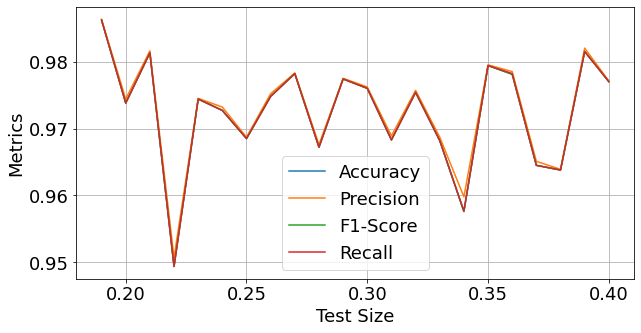

In [28]:
import matplotlib.pyplot as plt

#plt.figure(figsize = (15,10));
plt.figure(figsize = (10,5));
plt.plot(test_pers, acc_s, label = "Accuracy")
plt.plot(test_pers, prec_s, label = "Precision")
plt.plot(test_pers, f1_s, label = "F1-Score")
plt.plot(test_pers, reca_s, label = "Recall")

locs, labels = plt.xticks()

plt.rcParams['font.size'] = '18'
plt.ylabel('Metrics', fontsize = 18)
plt.xlabel('Test Size', fontsize = 18)
plt.legend()
plt.grid()
plt.show()

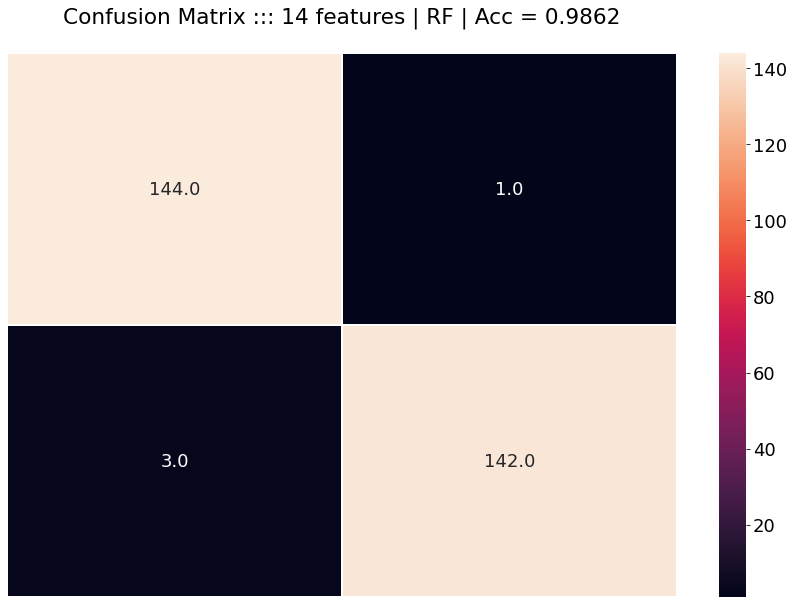

The best test_size is  0.19


In [29]:
max_index, max_value = max(enumerate(acc_s), key = operator.itemgetter(1))
plt.figure(figsize = (15, 10)); M = 'RF'; lma = '14 features'; acc = max_value
sns.heatmap(data = cm_list[max_index][1], annot = True, linewidth = 0.8, fmt = ".1f")
plt.title('Confusion Matrix ::: ' + lma + ' | ' + M + ' | Acc = ' + str(acc) + '\n')
plt.axis('off'); plt.show()
print('The best test_size is ',str(test_pers[max_index]))